# Practice reading text files

Be sure to look at [Intro_to_reading_text_files.ipynb](Intro_to_reading_text_files.ipynb) before coming in here.

---

The data for these exercises were generated from the following USGS dataset: https://pubs.usgs.gov/dds/dds-033/USGS_3D/ssx_txt/3dstart.htm

#### Note to instructors

The 55 files are of two types:

- Filenames starting `UWI_`, which have `#` as comments and `','` as the delimiter.
- Filenames without `UWI_`, which have `%` as the comment character and are TAB-delimited.

For both types:

- Units can be in feet or metres. (Coordinates are always in metres.)
- Formation names can be in order or not.
- If a file's units are `M`, then the porosities are v/votherwise they are percent. 

### EXERCISE

- Write a loop to visit all the lines of the given file.
- Ignore the lines that start with a comment character (`#` in this file). <a title="The string method startswith() will be useful, and you can 'ignore' lines with the keyword continue">**HINT**</a>
- Print the lines that contain formation tops. <a title="That is, the lines you don't skip.">**HINT**</a>
- When you get to the `# Porosity` section, stop reading the file. <a title="Use break to end the loop.">**HINT**</a>

In [1]:
fname = '../data/sussex/UWI_4900523013.tops'

with open(fname, 'rt') as f:
    for line in f:
        
        # YOUR CODE HERE

        print(line, end='')

# LOC: 38190.00 M,-32884.00 M
# KB: 1577.34 M
# TD: 3419.86 M
# UNITS: M
# Formations
Ardmore,2510.03
Cody,2521.61
Sussex Upper Top,2521.61
Sussex Lower Top,2527.71
Sussex Lower Base,2528.62
Sussex Upper Base,2529.54
Niobrara,2530.75
# Porosity
2521.31,0.184
2521.92,0.219
2522.52,0.145
2523.13,0.150
2523.74,0.135
2524.35,0.125
2524.96,0.140
2525.57,0.155
2526.18,0.155
2526.79,0.140
2527.40,0.160
2528.01,0.125
2528.62,0.106
2529.23,0.057
2529.84,0.087
2530.45,0.067
2531.06,0.087
2531.67,0.096


In [2]:
with open(fname, 'rt') as f:
    for line in f:
        if line.startswith('# Por'):
            break
        elif line.startswith('#'):
            continue
        print(line, end='')

Ardmore,2510.03
Cody,2521.61
Sussex Upper Top,2521.61
Sussex Lower Top,2527.71
Sussex Lower Base,2528.62
Sussex Upper Base,2529.54
Niobrara,2530.75


### EXERCISE

- Add to your code so that it creates an empty dictionary, then inside the loop you should add a `name: depth` pair for each of the formations listed. <a title="Split the line with the string method split(), passing in the delimeter character.">**HINT**</a>
- If you are adding depths as strings, convert them to floating point numbers before adding to the dictionary.

In [3]:
with open(fname, 'rt') as f:
    
    # Instantiate the new dictionary here (1 line).
    
    # ----- end ------
    
    # YOUR PREVIOUS CODE

    # Split the line and add to the dictionary here (2 or 3 lines).
    
    
    # ----- end ------
            
tops

IndentationError: expected an indented block (<ipython-input-3-73e4cd103c41>, line 14)

In [4]:
tops = {}    
with open(fname, 'rt') as f:
    for line in f:
        if line.startswith('# Por'):
            break
        elif line.startswith('#'):
            continue
        top, depth = line.split(',')
        tops[top] = float(depth)
tops

{'Ardmore': 2510.03,
 'Cody': 2521.61,
 'Sussex Upper Top': 2521.61,
 'Sussex Lower Top': 2527.71,
 'Sussex Lower Base': 2528.62,
 'Sussex Upper Base': 2529.54,
 'Niobrara': 2530.75}

### EXERCISE

Turn this code into a function called `read_tops()`.

Make sure everything, including the file reading, is handled by your function. Don't forget the docstring!

In [5]:
# YOUR CODE HERE
    


In [6]:
def read_tops(fname):
    """
    Read a TOPS file and produce a dictionary of formation:depth pairs.
    """
    tops = {}    
    with open(fname, 'rt') as f:
        for line in f:
            if line.startswith('# Por'):
                break
            elif line.startswith('#'):
                continue
            top, depth = line.split(',')
            tops[top] = float(depth)
    return tops

The following code block should work:

In [7]:
fname = '../data/sussex/UWI_4900523013.tops'

tops = read_tops(fname)
tops

{'Ardmore': 2510.03,
 'Cody': 2521.61,
 'Sussex Upper Top': 2521.61,
 'Sussex Lower Top': 2527.71,
 'Sussex Lower Base': 2528.62,
 'Sussex Upper Base': 2529.54,
 'Niobrara': 2530.75}

### EXERCISE

Make a plot of the tops using `ax.axhline()` to add lines and `ax.text()` to add labels.

In [8]:
import matplotlib.pyplot as plt

# YOUR CODE HERE



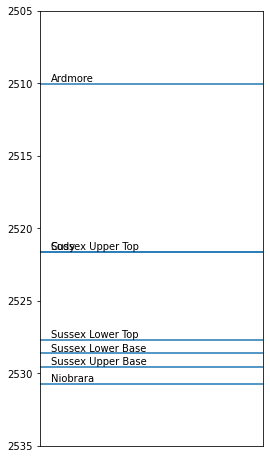

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 8))

for name, depth in tops.items():
    ax.axhline(depth)
    ax.text(0.05, depth, name, va='bottom')
    ax.set_ylim(2535, 2505)    
    ax.set_xticks([])

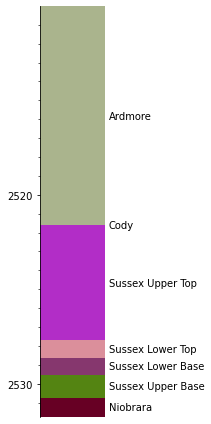

In [13]:
# Coming in striplog 0.8.8
from striplog import Striplog

s = Striplog.from_dict(tops)

s.plot(label='formation', aspect=4)

### EXERCISE

When the function works on `../data/sussex/UWI_4900523013.tops`, use your function to read `UWI_4900523863.tops`. Notice that the depths seem a lot deeper than the previous file. Why do you think this is?

- Adapt your function so that it reads the units.
- If the units are `'FT'`, then you will have to multiply the depths by 0.3048.
- If you encounter the depth -999.25, either skip the record or replace `-999.25` with `np.nan`.

In [ ]:
# YOUR CODE HERE
# Start by copying and pasting the function from the previous exercise.



In [ ]:
def read_tops(fname):
    """
    Read a TOPS file and produce a dictionary of formation:depth pairs.
    """
    tops = {}    
    with open(fname, 'rt') as f:
        for line in f:
            if line.startswith('# Por'):
                break
                
            # NEW BIT
            elif line.startswith('# UNITS:'):
                units = line[line.find(':')+1:].strip().upper()
                mult = 1 if units == 'M' else 0.3048
                continue
            # ----- end -----

            elif line.startswith('#'):
                continue

            top, depth = line.split(',')
            
            # NEW BIT
            if depth.strip() == '-999.25':
                continue
            # ----- end -----
            
            tops[top] = mult * float(depth)  # <-- put the muliplier here

    return tops

In [ ]:
read_tops(fname)

In [ ]:
read_tops('../data/sussex/UWI_4900523863.tops')

# This should not contain tops for Sussex Lower, and values should be around 2450.

### EXERCISE

As well as the tops dictionary, get your function to hand back the (x, y) location of the well.

Remember you have the `clean_quantity()` code from `Intro_to_Python` (it might even be in your `utils.py` module). We can use it here:

In [ ]:
# YOUR CODE HERE



In [ ]:
def clean_quantity(quantity):
    """Clean the units from a number."""
    if 'm' in quantity.lower():
        units = 'M'
    elif 'f' in quantity.lower():
        units = 'FT'
    else:
        units = None

    stripped = quantity.lower().strip(' .mft\n\t')
    value = stripped.replace(',', '')

    return float(value), units


def read_tops(fname):
    """
    Read a TOPS file and produce a dictionary of formation:depth pairs.
    """
    tops = {}    
    with open(fname, 'rt') as f:
        for line in f:
            if line.startswith('# Por'):
                break
                
            # NEW BIT
            elif line.startswith('# LOC:'):
                _, data = line.split(':')
                x, y = data.split(',')
                x, loc_units = clean_quantity(x)
                y, _ = clean_quantity(y)
                assert loc_units == 'M'  # <-- sensible
                continue
            # ----- end -----

            elif line.startswith('# UNITS:'):
                units = line[line.find(':')+1:].strip().upper()
                mult = 1 if units == 'M' else 0.3048
                continue

            elif line.startswith('#'):
                continue

            top, depth = line.split(',')
            
            if depth.strip() == '-999.25':
                continue
            
            tops[top] = mult * float(depth)  # <-- put the muliplier here

    return (x, y), tops

In [ ]:
read_tops('../data/sussex/UWI_4900523863.tops')

### EXERCISE

1. Use `glob.glob` to count the TOPS files in `../data/sussex` whose name starts with `UWI_`. You should find there are 30 files.
1. Now write a function that takes the POSIX-path you just wrote and retrieves the (x, y) location and tops dictionary for each file.
1. Store the result for each file in a new dictionary, and store all the results in either one big dict, or in a list of dicts (in which case you'll want the UWI of the well in the inner dictionary).

You'll find this useful:

In [ ]:
from os.path import basename, splitext

fname = '../data/sussex/UWI_4900523863.tops'

# Break up the filename:
uwi, _ = splitext(basename(fname))
uwi[4:]

# NB Python 3.9 has uwi.removeprefix('UWI_'), which is safer than the slicing I do here:

In [ ]:
# YOUR CODE HERE



In [ ]:
import glob

len(glob.glob('../data/sussex/UWI_*.tops'))

In [ ]:
def read_all_tops(path):
    """
    Use read_tops to visit each file in a POSIX-path, producing a dict of data from
    all files, with 
    """
    results = {}
    for fname in glob.glob(path):
        (x, y), tops = read_tops(fname)
        uwi, _ = splitext(basename(fname))
        results[int(uwi[4:])] = {'pos': (x, y), 'tops': tops}  # Could also store x and y as separate keys.
    return results

all_tops = read_all_tops('../data/sussex/UWI_*.tops')
all_tops

### Instructor notes

There are two obvious datastructures:

    [
     {'uwi': 123, 'pos': (201, 302), 'tops': {'A': 333, 'B': 444, 'C': 555}},
     {'uwi': 234, 'pos': (203, 304), 'tops': {'A': 303, 'B': 404, 'C': 505}},
    ]
    
_vs_

    {
     123: {'pos': (201, 302), 'tops': {'A': 333, 'B': 444, 'C': 555}},
     234: {'pos': (203, 304), 'tops': {'A': 303, 'B': 404, 'C': 505}},
    }
    
The former style is fairly common as a JSON payload from a web API. One might throw these dictionaries straight into a database or something. But it's hard to retrieve a specific well in that case. Ultimately, how you want to use the thing is the guide to how to do it.

### EXERCISE

Make a scatter plot of the **Sussex Upper Top**.

We have to essentially transpose the data, because right now it's stored per well (which you can think of as rows in a table), whereas we want a 'column' of data. This means visiting all the 'rows' and retrieving the data we want.

You can use a loop, or write list comprehensions.

In [ ]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
x = 
y = 
z = 

plt.figure(figsize=(6, 9))
plt.scatter(x, y, c=z)
plt.axis('equal')

In [ ]:
import matplotlib.pyplot as plt

x = [data['pos'][0] for data in all_tops.values()]
y = [data['pos'][1] for data in all_tops.values()]
z = [data['tops']['Sussex Upper Top'] for data in all_tops.values()]

plt.figure(figsize=(6, 9))
plt.scatter(x, y, c=z)
plt.axis('equal')

In [ ]:
# Another approach, avoiding traversing the list another time:
xy = [data['pos'] for data in all_tops.values()]
plt.scatter(*zip(*xy), c=z)

## Query

Fetch the x, y, and Niobrara depth of the wells with top Nibrara deeper than 2500 m?

In [ ]:
# YOUR CODE HERE


In [ ]:
# Build this up.
# Doesn't really matter what we return, I chose a tuple here to match the SQL example later.
[data['pos']+(data['tops']['Niobrara'],) for data in all_tops.values() if data['tops']['Niobrara'] > 2500]

---

## Make a map!

Let's interpolate these points to make a map...

In [ ]:
from scipy.interpolate import Rbf
import numpy as np

interpolator = Rbf(x, y, z, epsilon=2500)

# Note the x, y switch, because mgrid works like rows, columns.
grid_y, grid_x = np.mgrid[-35000:-25000:100, 35000:43000:100]

z_hat = interpolator(grid_x, grid_y)

plt.figure(figsize=(6, 9))
plt.imshow(z_hat, extent=[35000, 43000, -35000, -25000], origin='lower', aspect='auto', vmin=2400, vmax=2600)
plt.scatter(x, y, c=z, s=60, vmin=2400, vmax=2600, ec='w')
plt.colorbar()

---

## Sneak peek at `pandas`

If we stored the data in a `pandas.DataFrame`, this would be a little easier. The catch is that getting it into `pandas` may or may not be an enjoyable experience, depending on the organization of the data to start with.

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(all_tops).transpose()
df.head()

In [ ]:
# Build this up
pd.DataFrame(df.pos.to_list(), columns=['x', 'y'], index=df.index)

In [ ]:
tables = [df.drop(['pos', 'tops'], axis=1), 
          pd.DataFrame(df.pos.to_list(), columns=['x', 'y'], index=df.index),
          df.tops.apply(pd.Series),
         ]

df = pd.concat(tables, axis=1)

In [ ]:
plt.figure(figsize=(6, 9))
plt.scatter(df.x, df.y, c=df['Sussex Upper Top'])
plt.axis('equal')

---

## Demo: Using SQLite

See _Writing to files and databases_ for more on SQLite.

In [ ]:
# Run this if you need to nuke the database:
!rm ./tops.db

Build the tables:

In [ ]:
import sqlite3

con = sqlite3.connect('tops.db')

with con:
    
    cur = con.cursor()
    cur.execute("CREATE TABLE wells([uwi] INT PRIMARY KEY, [x] DECIMAL, [y] DECIMAL)")
    cur.execute("CREATE TABLE strat([uwi] INT, [formation] TEXT, [depth] DECIMAL)")
    

Populate with data from `all_tops`:

In [ ]:
with con:
    for uwi, data in all_tops.items():
        cur.execute(f"INSERT INTO wells VALUES({uwi},{data['pos'][0]},{data['pos'][1]})")
        for name, depth in data['tops'].items():
            cur.execute(f"INSERT INTO strat VALUES({uwi},'{name}',{depth})")

An example query:

In [ ]:
con = sqlite3.connect('tops.db')

with con:    
    
    cur = con.cursor()    
    cur.execute("""
       SELECT wells.x, wells.y, strat.depth 
       FROM wells INNER JOIN strat 
       ON wells.uwi = strat.uwi
       WHERE strat.formation IS 'Niobrara' AND strat.depth > 2500
    """)

    rows = cur.fetchall()  # Can also fetchone

for row in rows:
    print(row)

---

# Intro to Python students stop here

---

What follows are more exercises, left as challenges to the student:

### EXERCISE

Try reading the files without `UWI_` in the filename.

- You will need to let the user choose different 'comment' characters, or try to auto-detect it if you dare!
- You will also need to allow for different delimiters, other than a comma. Again as an option or with magic.
- You might want to handle the null values differently.
- Maybe print some 'progress logging' as you go, so the user knows what's going on. If you want, dig into the `logging` or `warnings` modules built in to Python.

### EXERCISE

Retrieve the porosity values from the files, storing them as another dictionary of depth:porosity pairs.

- Notice that files with Imperial units have different units for the porosities as well. Dammit.
- Write a function to compute the mean porosity in a given unit from the data you generated.
- Make a map of porosity in a given zone, labeling the map with the zone name and its mean porosity.

---

&copy; 2020 Agile Scientific